# Is there a relationship between the number of bicyclists who use different bike paths on the same day? Can we predict how many riders there will be on one path given how many are on another?
source of dataset: https://www.kaggle.com/datasets/pablomonleon/montreal-bike-lanes

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [192]:
# load data
pd.set_option('display.max.rows',380)
df= pd.read_csv('/Users/imac/Downloads/comptagesvelo2015.csv')
df.info()

# check for duplicated and NaN values
df.duplicated().sum()
df.isnull().sum()

# correlation table
df.corr()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         319 non-null    object 
 1   Unnamed: 1                   319 non-null    object 
 2   Berri1                       319 non-null    int64  
 3   Boyer                        319 non-null    int64  
 4   Brébeuf                      319 non-null    int64  
 5   CSC (Côte Sainte-Catherine)  319 non-null    int64  
 6   Maisonneuve_1                62 non-null     float64
 7   Maisonneuve_2                319 non-null    int64  
 8   Maisonneuve_3                319 non-null    int64  
 9   Notre-Dame                   319 non-null    int64  
 10  Parc                         319 non-null    int64  
 11  Parc U-Zelt Test             52 non-null     float64
 12  PierDup                      319 non-null    int64  
 13  Pont_Jacques_Cartier

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,02/01/2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,03/01/2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,04/01/2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,05/01/2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10
5,06/01/2015,00:00,101,0,1,1,62.0,153,38,3,...,NaN,1,12,64,23,NaN,29,121,91,5
6,07/01/2015,00:00,121,15,5,3,38.0,144,35,1,...,NaN,11,24,40,3,NaN,5,120,63,4
7,08/01/2015,00:00,70,0,36,0,39.0,139,36,4,...,NaN,38,67,21,7,NaN,1,83,78,2
8,09/01/2015,00:00,88,3,5,0,55.0,135,26,12,...,NaN,26,63,14,10,NaN,1,166,79,1
9,10/01/2015,00:00,29,7,6,0,24.0,70,17,3,...,NaN,15,29,0,7,NaN,0,32,41,1


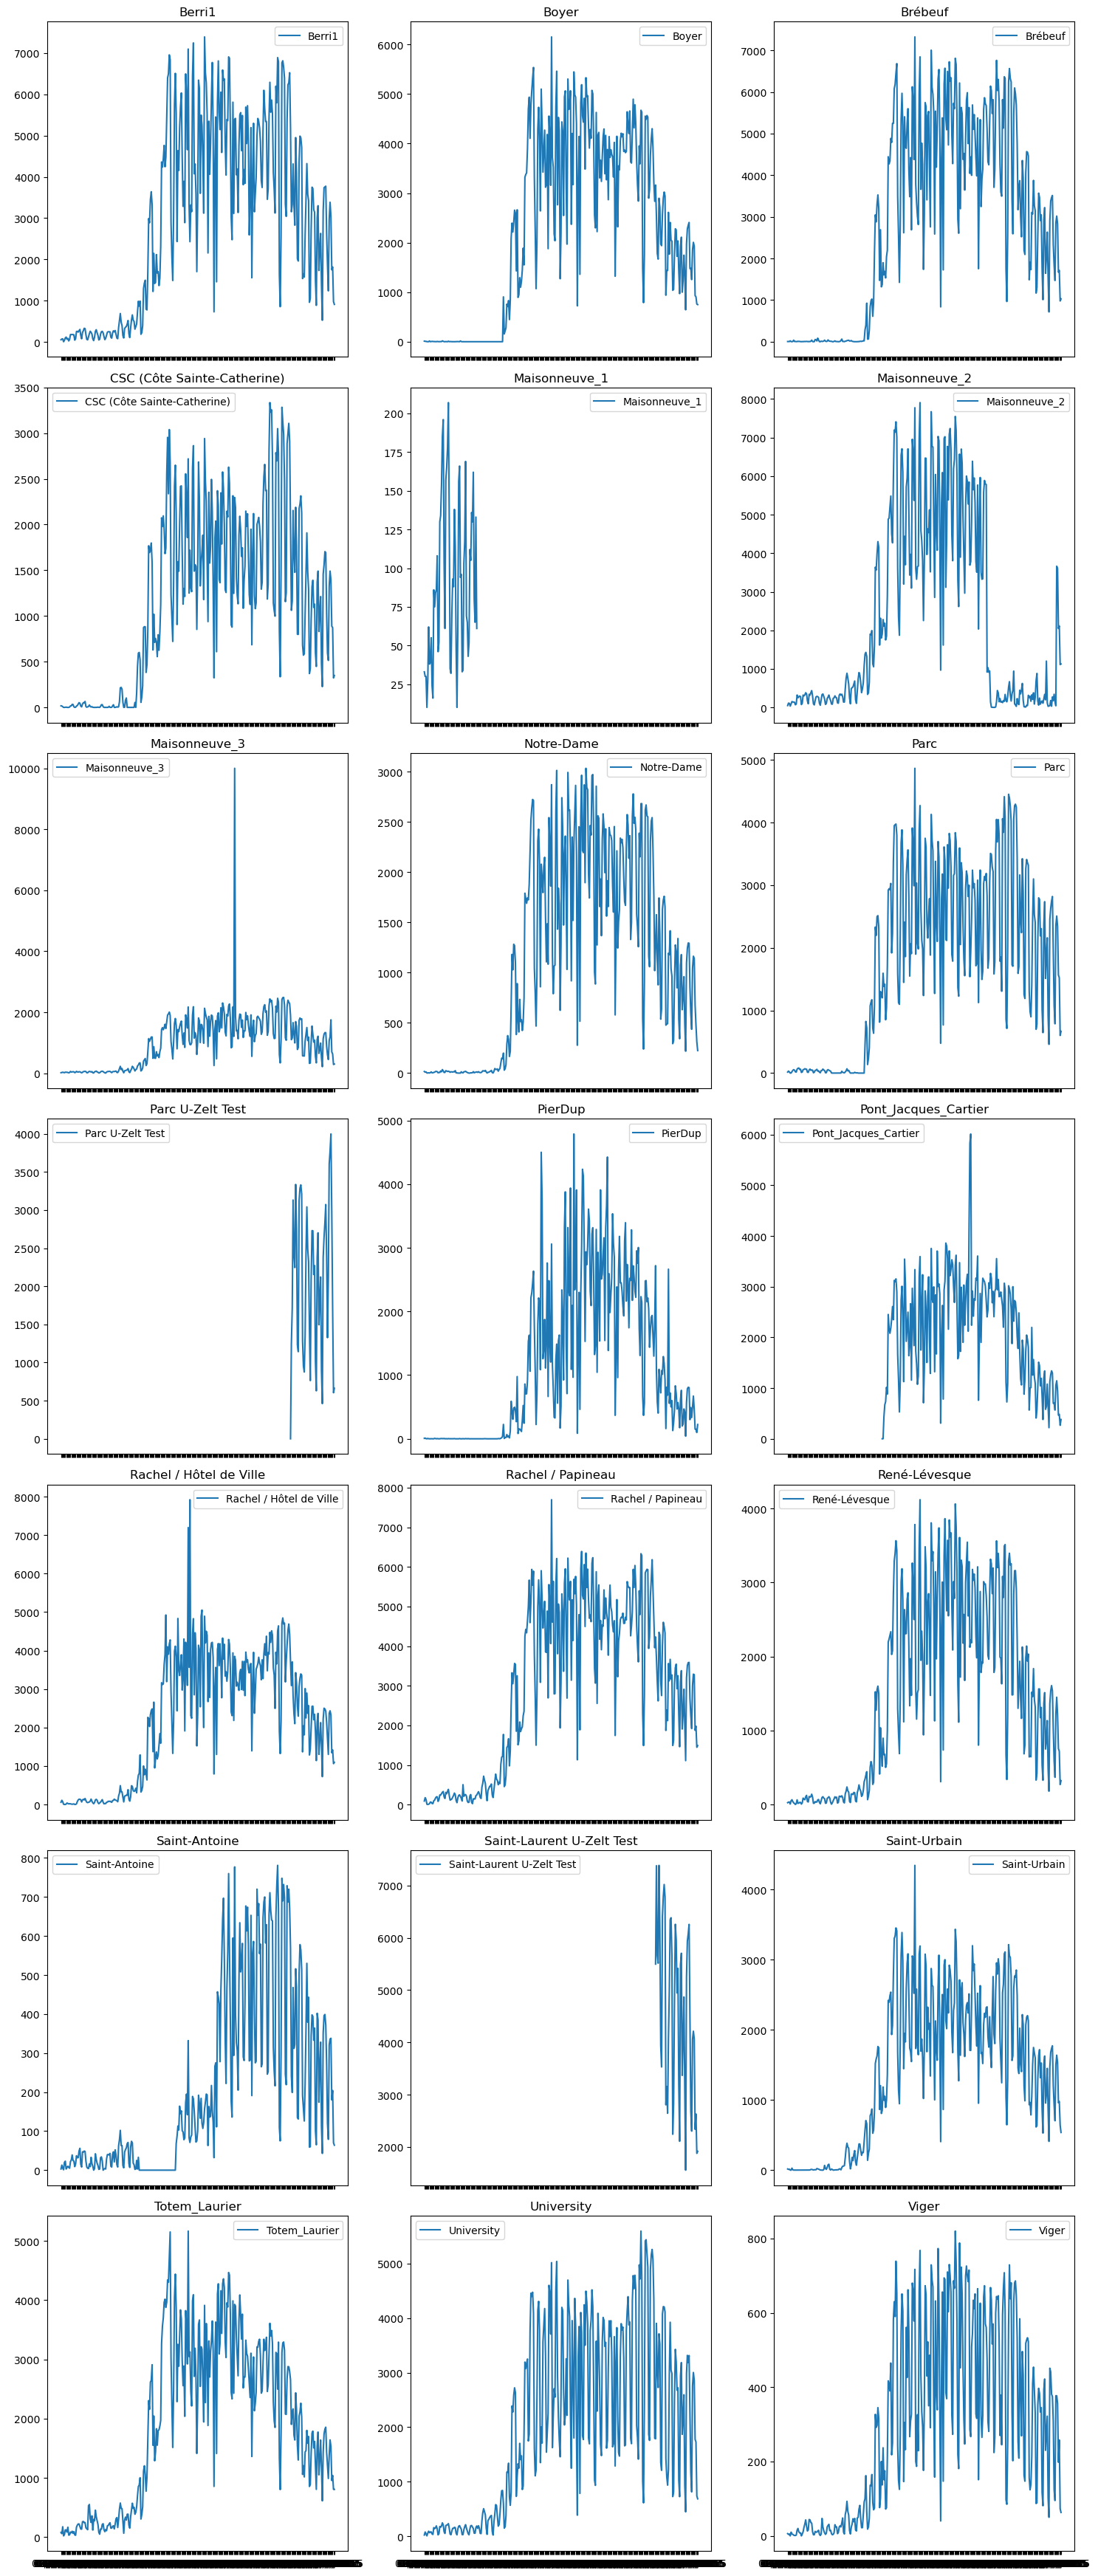

In [66]:
# plot Date by each street umber of bicyclists to check correlation
df.set_index('Date', inplace=True)
street_columns = df.columns[1:22]

num_rows = (len(street_columns) - 1) // 3 + 1

# plot selected columns on separate subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows), sharex=True)
axs = axs.ravel()
for i, street in enumerate(street_columns):
    axs[i].plot(df.index, df[street], label=street)
    axs[i].set_title(street)
    axs[i].legend()

# remove any empty subplot
for j in range(len(street_columns), len(axs)):
    fig.delaxes(axs[j])    

plt.tight_layout()
plt.show()

Maisonneuve_1 has no continuous data for some reason, Parc U-Zelt Test, Saint-Laurent U-Zelt Test has no continuous data because they maybe test paths.

On 22/07/2015 Maisonneuve_3 had 9999 bicyclist on that day, perhaps due to some event or race. We consider this value as an outlier.
On 29/05/2015 Rachel / Hôtel de Ville had 7197 and on 31/05/2015 had 7921 bicyclists.

Handling Outliers

In [193]:
# impute the outlier in Maisonneuve_3 value of 9999 with a sensible value based on the surrounding data points
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
outlier_index1 = pd.to_datetime('22/07/2015')

# find the surrounding data points
days_before1 = 3
days_after1 = 3
surrounding_data1 = df.loc[outlier_index1 - pd.DateOffset(days=days_before1):outlier_index1 + pd.DateOffset(days=days_after1)]

# calculate the imputation value using the median
imputation_value1 = surrounding_data1['Maisonneuve_3'].median()

# replace the outlier with the imputation value
df.loc[outlier_index1, 'Maisonneuve_3'] = imputation_value1

# the outlier has been replaced with 1411
print(df.loc[outlier_index1, 'Maisonneuve_3'])



# impute the outlier in Rachel / Hôtel de Ville value of 7197/7921 with a sensible value based on the surrounding data points
outlier_index2 = pd.to_datetime('29/05/2015')

# find the surrounding data points
days_before2 = 3
days_after2 = 1
surrounding_data2 = df.loc[outlier_index2 - pd.DateOffset(days=days_before2):outlier_index2 + pd.DateOffset(days=days_after2)]

# calculate the imputation value using the median
imputation_value2 = surrounding_data2['Rachel / Hôtel de Ville'].median()

# replace the outlier with the imputation value
df.loc[outlier_index2, 'Rachel / Hôtel de Ville'] = imputation_value2

# the outlier has been replaced with 3754
print(df.loc[outlier_index2, 'Rachel / Hôtel de Ville'])

outlier_index3 = pd.to_datetime('31/05/2015')

# find the surrounding data points
days_before3 = 10
days_after3 = 10
surrounding_data3 = df.loc[outlier_index3 - pd.DateOffset(days=days_before3):outlier_index3 + pd.DateOffset(days=days_after3)]

# calculate the imputation value using the median
imputation_value3 = surrounding_data3['Rachel / Hôtel de Ville'].median()

# replace the outlier with the imputation value
df.loc[outlier_index3, 'Rachel / Hôtel de Ville'] = imputation_value3

# the outlier has been replaced with 3661
print(df.loc[outlier_index3, 'Rachel / Hôtel de Ville'])

1411
3754
3661


Prediction

Mean Squared Error: 6033.982916672392
R-squared: 0.9947351813938451


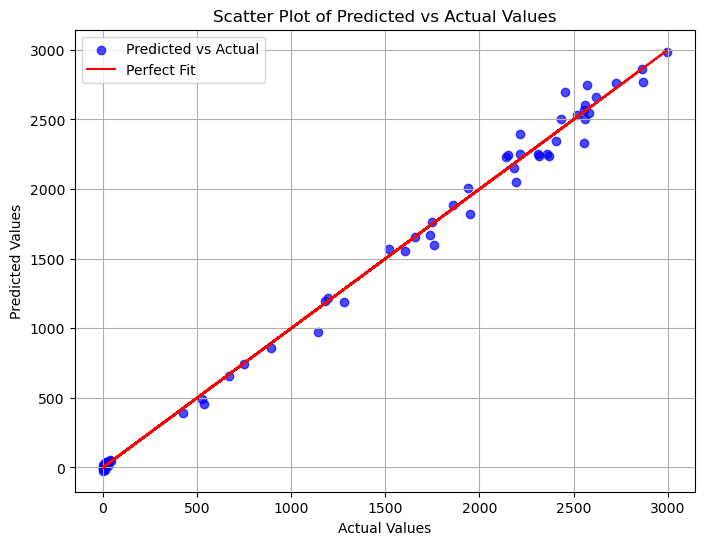

Root Mean Squared Error (RMSE): 77.6787159823873


,Actual,Predicted
Date,,
2015-03-15,1,-2.625083
2015-07-08,2315,2238.445042
2015-01-26,24,32.472212
2015-07-28,2581,2545.514159
2015-10-01,3,-12.626049
2015-12-04,667,658.080235
2015-06-26,2865,2859.306115
2015-06-07,2870,2772.656099
2015-05-03,14,41.254046


In [194]:
# drop columns with insufficient data, pre-processing data
pd.set_option('display.max.rows',100)
df = pd.read_csv('/Users/imac/Downloads/comptagesvelo2015.csv')
df.drop(columns=['Maisonneuve_1', 'Parc U-Zelt Test', 'Saint-Laurent U-Zelt Test','Pont_Jacques_Cartier' ], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# correlation, feature selection
correlation_map = df.corr()
target_street = 'Notre-Dame'
top_correlated_streets = correlation_map[target_street].nlargest(10).index.tolist()
top_correlated_streets.remove(target_street)

# data splitting
X = df[top_correlated_streets]
y = df[target_street]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

# model evaluation
y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mae}")
print(f"R-squared: {r2}")


# comparison plot of 'Actual' and 'Predicted' values
actual_values = comparison_df['Actual']
predicted_values = comparison_df['Predicted']

plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, alpha=0.7, color='b', label='Predicted vs Actual')
plt.plot(actual_values, actual_values, color='r', label='Perfect Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

mse = 6033.982916672392

# calculate the RMSE
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

comparison_df